In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 결정트리

In [6]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
dfy

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
counts = dfy['target'].value_counts()
print(counts)

0    50
1    50
2    50
Name: target, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [10]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

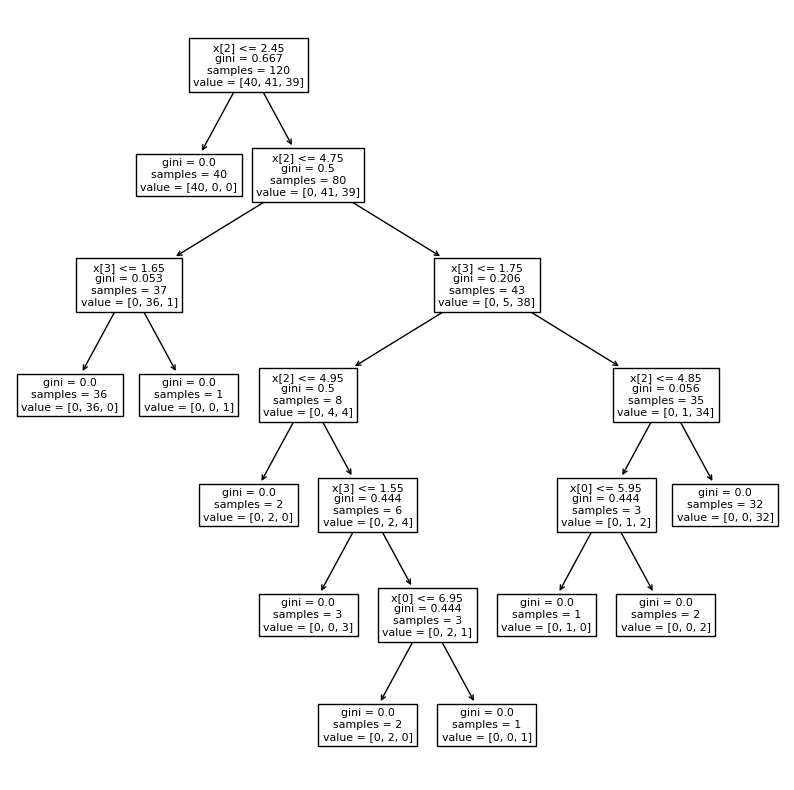

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [74]:
y_pred = dtc.predict(X_test)
y_pred

ValueError: ignored

In [15]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


정확도 :  1.0


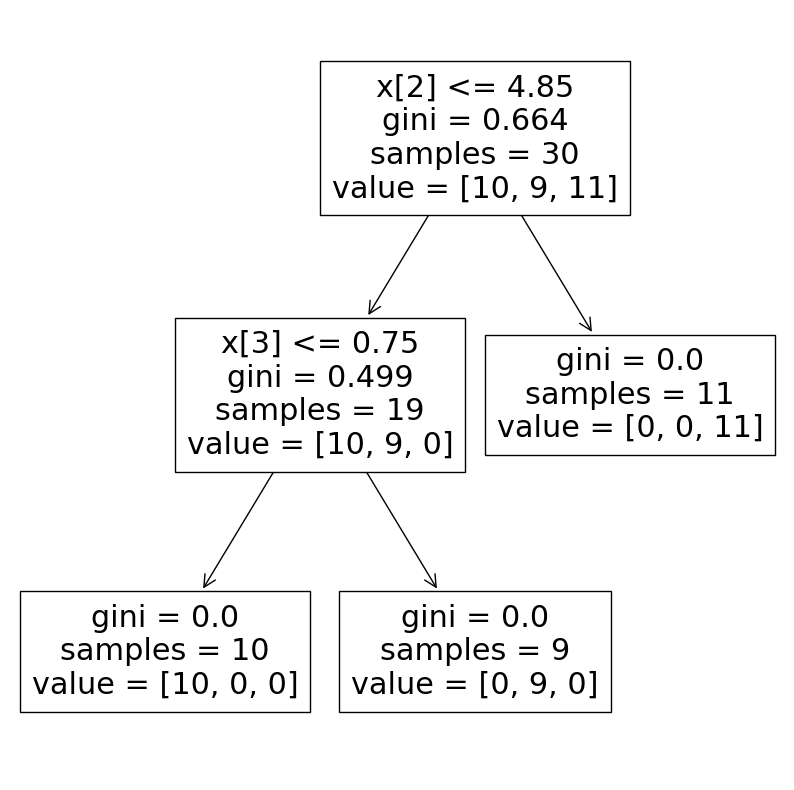

In [22]:
print("정확도 : ", acc)
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_test, y_test)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [23]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


# 펭귄데이터로 결정트리

In [75]:
df = pd.read_csv('/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 결측치 확인

In [76]:
missing_values = df.isnull().sum()
print(missing_values)
counts = df['sex'].value_counts()
print(counts)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [77]:
# 결측치를 평균값으로 채워줌

df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

# 'sex' 열의 결측치를 해당 열의 최빈값으로 채우기
most_frequent_sex = df['sex'].mode()[0]
df['sex'].fillna(most_frequent_sex, inplace=True)

In [78]:
missing_values = df.isnull().sum()
print(missing_values)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [79]:
# 'island' 열의 'Torgersen', 'Dream', 'Biscoe	' 값을 각각 0, 1, 2로 변환
df['island'] = df['island'].replace({'Torgersen': 0, 'Dream': 1, 'Biscoe': 2})

# 성별도 female 0 male 1
df['sex'] = df['sex'].replace({'FEMALE': 0, 'MALE': 1})

# 종류도 Adelie 0 Chinstrap 1 Gentoo 2
df['species'] = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [80]:
# 'sex' 열에서 '.'을 1으로 대체
df['sex'] = df['sex'].replace('.', 1)

In [81]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.10000,18.70000,181.000000,3750.000000,1
1,0,0,39.50000,17.40000,186.000000,3800.000000,0
2,0,0,40.30000,18.00000,195.000000,3250.000000,0
3,0,0,43.92193,17.15117,200.915205,4201.754386,1
4,0,0,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,2,2,43.92193,17.15117,200.915205,4201.754386,1
340,2,2,46.80000,14.30000,215.000000,4850.000000,0
341,2,2,50.40000,15.70000,222.000000,5750.000000,1
342,2,2,45.20000,14.80000,212.000000,5200.000000,0


In [82]:
X = df.drop('species', axis=1)
y = df['species']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [85]:
X_test

array([[1.00000000e+00, 5.09000000e+01, 1.91000000e+01, 1.96000000e+02,
        3.55000000e+03, 1.00000000e+00],
       [1.00000000e+00, 4.52000000e+01, 1.78000000e+01, 1.98000000e+02,
        3.95000000e+03, 0.00000000e+00],
       [2.00000000e+00, 4.65000000e+01, 1.35000000e+01, 2.10000000e+02,
        4.55000000e+03, 0.00000000e+00],
       [1.00000000e+00, 4.52000000e+01, 1.66000000e+01, 1.91000000e+02,
        3.25000000e+03, 0.00000000e+00],
       [2.00000000e+00, 4.84000000e+01, 1.44000000e+01, 2.03000000e+02,
        4.62500000e+03, 0.00000000e+00],
       [2.00000000e+00, 4.81000000e+01, 1.51000000e+01, 2.09000000e+02,
        5.50000000e+03, 1.00000000e+00],
       [2.00000000e+00, 5.11000000e+01, 1.65000000e+01, 2.25000000e+02,
        5.25000000e+03, 1.00000000e+00],
       [2.00000000e+00, 4.27000000e+01, 1.37000000e+01, 2.08000000e+02,
        3.95000000e+03, 0.00000000e+00],
       [2.00000000e+00, 3.96000000e+01, 2.07000000e+01, 1.91000000e+02,
        3.90000000e+03, 

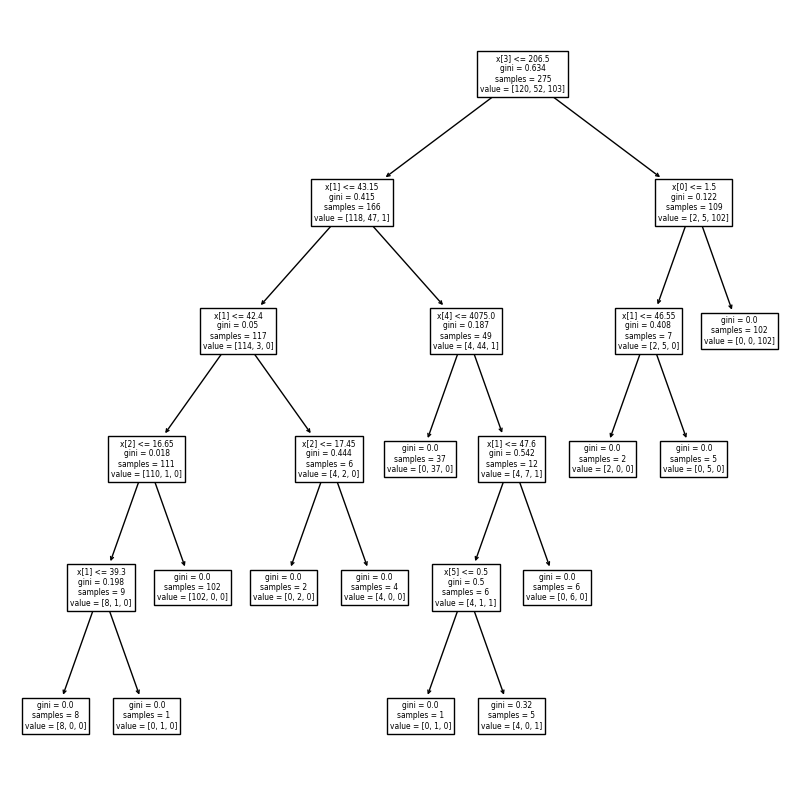

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [87]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [88]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  0.9855072463768116


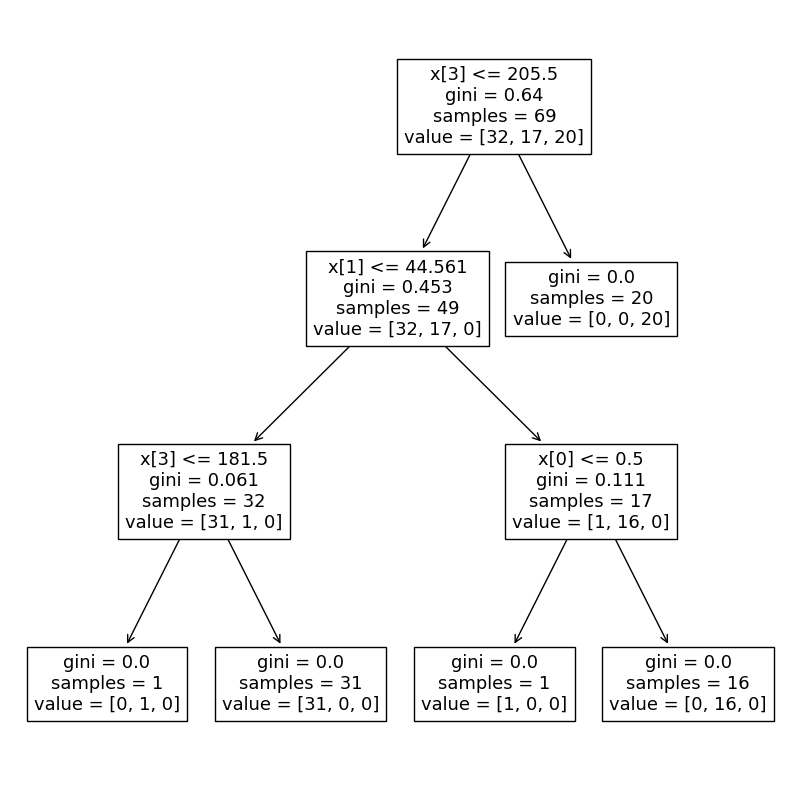

In [90]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_test, y_pred)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

# 앙상블

## knn과 로지스틱 회귀로 보팅을 만들어 비교, 유방암 데이터

In [91]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 모델 생성

In [97]:
# 모델생성
# 로지스틱 회귀 모델을 만들고 KNN모델을 만들고 두 모델로 보팅 모델
# estimators는 리스트 안에 꼭 튜플 형식으로 집어넣어 줘야 한다. voting 방식은 하드가 아니라 소프트로 지정해준다. 기본값은 하드
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [98]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=999)

classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print(f"{name} 정확도 : {accuracy_score(y_test, pred)}")

VotingClassifier 정확도 : 0.9532163742690059
LogisticRegression 정확도 : 0.9298245614035088
KNeighborsClassifier 정확도 : 0.9181286549707602


## 앙상블 배깅, 랜덤포레스트

In [125]:
# 라이브러리

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV

In [101]:
# 모델 생성

cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

params = {'n_estimators': [95], 'max_depth': [6, 8, 10, 12, 14, 16], 'min_samples_leaf': [2, 4, 8, 12, 16, 18],
          'min_samples_split': [2, 4, 8, 12, 16, 20]}

clf = RandomForestClassifier(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 95}
최고 예측 정확도: 0.9647887323943662


# 보스턴 데이터 앙상블

In [126]:
csv_path = '/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/Boston_house.csv'

df = pd.read_csv(csv_path)
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [127]:
missing_values = df.isnull().sum()
missing_values

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

## 학습 데이터 설정

In [128]:
X = df.drop('Target', axis=1)
y = df['Target']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 모델 설정

In [120]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

lr_reg = LinearRegression()
knn_reg = KNeighborsRegressor(n_neighbors=8)
vo_reg = VotingRegressor(estimators=[("LR", lr_reg), ("KNN", knn_reg)])

## 결과

In [132]:
regression = [vo_reg, lr_reg, knn_reg]
for reg in regression:
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    name = reg.__class__.__name__
    print(name)
    mse = mean_squared_error(y_test, pred)
    print(f"mse: {mse}")

VotingRegressor
mse: 20.54148031998295
LinearRegression
mse: 24.291119474973588
KNeighborsRegressor
mse: 33.369483762254895


## 스케일링

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
for reg in regression:
    reg.fit(X_train_scaled, y_train)
    pred = reg.predict(X_test_scaled)
    name = reg.__class__.__name__
    print(name)
    mse = mean_squared_error(y_test, pred)
    print(f"mse: {mse}")

VotingRegressor
mse: 19.957068817174882
LinearRegression
mse: 24.291119474973545
KNeighborsRegressor
mse: 23.709829963235297
